In [1]:
import pandas as pd

In [7]:
docs = pd.read_csv("smsspamcollection.csv", names=['Class','sms'])
docs.head()

,Class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
docs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
spam_ham = docs.Class.value_counts()
spam_ham

Class
ham     4825
spam     747
Name: count, dtype: int64

In [10]:
docs['label'] = docs.Class.map({'ham': 0, 'spam': 1})

In [11]:
docs.head()

,Class,sms,label
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [12]:
docs = docs.drop('Class', axis=1)

In [13]:
docs.head()

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [14]:
X = docs.sms
y = docs.label

print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

In [18]:
X_train.head()

710     4mths half price Orange line rental & latest c...
3740                           Did you stitch his trouser
2711    Hope you enjoyed your new content. text stop t...
3155    Not heard from U4 a while. Call 4 rude chat pr...
3748    Ü neva tell me how i noe... I'm not at home in...
Name: sms, dtype: object

In [19]:
y_train.head()

710     1
3740    0
2711    1
3155    1
3748    0
Name: label, dtype: int64

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words="english")

In [21]:
vect.fit(X_train)

CountVectorizer(stop_words='english')

In [56]:
len(vect.vocabulary_)

7204

In [23]:
len(vect.vocabulary_)

7204

In [24]:
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [25]:
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 50)	1
  (0, 264)	1
  (0, 509)	1
  (0, 1527)	1
  (0, 1971)	1
  (0, 2780)	2
  (0, 3089)	1
  (0, 3763)	1
  (0, 3852)	1
  (0, 4248)	1
  (0, 4624)	1
  (0, 4626)	1
  (0, 4818)	1
  (0, 4822)	1
  (0, 5027)	1
  (0, 5310)	1
  (0, 6674)	1
  (1, 2169)	1
  (1, 6028)	1
  (1, 6545)	1
  (2, 98)	1
  (2, 563)	1
  (2, 1867)	1
  (2, 2436)	1
  (2, 3180)	1
  :	:
  (4176, 3879)	1
  (4176, 4417)	1
  (4176, 5229)	1
  (4176, 6191)	1
  (4176, 7135)	1
  (4177, 254)	1
  (4177, 307)	1
  (4177, 358)	1
  (4177, 831)	1
  (4177, 2046)	1
  (4177, 2704)	1
  (4177, 3585)	1
  (4177, 3623)	1
  (4177, 4130)	1
  (4177, 4315)	1
  (4177, 4771)	1
  (4177, 5234)	1
  (4177, 5321)	1
  (4177, 5487)	1
  (4177, 5620)	1
  (4177, 6321)	1
  (4177, 6374)	1
  (4177, 6453)	1
  (4178, 1643)	1
  (4178, 5817)	1


In [26]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_transformed, y_train)

y_pred_class = mnb.predict(X_test_transformed)

y_pred_proba = mnb.predict_proba(X_test_transformed)

In [27]:
mnb

MultinomialNB()

In [28]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9877961234745154

In [29]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[1201,    7],
       [  10,  175]], dtype=int64)

In [30]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)

TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]
TP = confusion[1,1]

In [31]:
sensitivity = TP / float(FN+TP)
print("sensitivity", sensitivity)

sensitivity 0.9459459459459459


In [33]:
specificity = TN / float(TN + FP)
print("specificity", specificity)

specificity 0.9942052980132451


In [34]:
precision = TP / float(TP + FP)
print("precision", precision)

precision 0.9615384615384616


In [36]:
print("F1 Score", metrics.f1_score(y_test, y_pred_class))
print("Recall scrore", metrics.recall_score(y_test, y_pred_class))
print("Precision score", metrics.precision_score(y_test,y_pred_class))

F1 Score 0.9536784741144414
Recall scrore 0.9459459459459459
Precision score 0.9615384615384616


In [37]:
y_pred_class

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [38]:
y_pred_proba

array([[9.95239557e-01, 4.76044325e-03],
       [9.99852357e-01, 1.47642544e-04],
       [9.27878579e-01, 7.21214213e-02],
       ...,
       [9.99999671e-01, 3.28799076e-07],
       [3.72703622e-09, 9.99999996e-01],
       [9.99999985e-01, 1.46852511e-08]])

In [42]:
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [43]:
print(roc_auc)

0.9921872203329157


In [44]:
pd.DataFrame({'Threshold': threshold,
             'TPR': true_positive_rate,
             'FPR': false_positive_rate})

,Threshold,TPR,FPR
0,inf,0.000000,0.000000
1,1.000000e+00,0.308108,0.000000
2,1.000000e+00,0.313514,0.000000
3,1.000000e+00,0.335135,0.000000
4,1.000000e+00,0.340541,0.000000
...,...,...,...
105,6.325596e-13,1.000000,0.959437
106,6.086604e-13,1.000000,0.961093
107,4.174215e-14,1.000000,0.970199
108,3.968331e-14,1.000000,0.972682


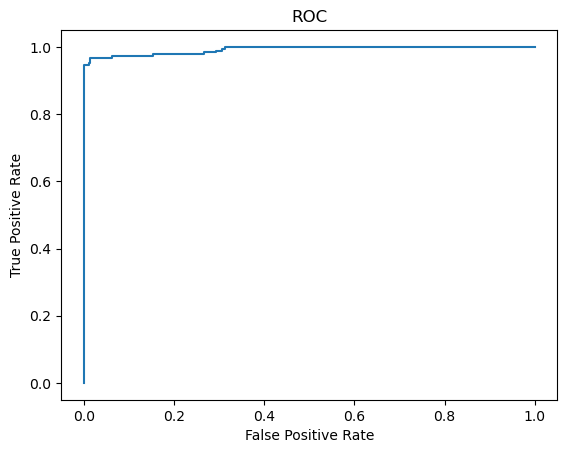

In [46]:
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

In [47]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(X_train_transformed, y_train)

y_pred_class_bnb = bnb.predict(X_test_transformed)

y_pred_proba_bnb = bnb.predict_proba(X_test_transformed)

from sklearn import metrics

metrics.accuracy_score(y_test, y_pred_class_bnb)

0.9770279971284996

In [48]:
metrics.confusion_matrix(y_test, y_pred_class_bnb)

array([[1207,    1],
       [  31,  154]], dtype=int64)

In [52]:
confusion_bnb = metrics.confusion_matrix(y_test, y_pred_class_bnb)

TN1 = confusion_bnb[0,0]
FP1 = confusion_bnb[0,1]
FN1 = confusion_bnb[1,0]
TP1 = confusion_bnb[1,1]

In [53]:
sensitivity_bnb = TP1 / float(FN1+TP1)
print("sensitivity", sensitivity_bnb)

sensitivity 0.8324324324324325


In [54]:
specificity_bnb = TN1 / float(TN1 + FP1)
print("specificity", specificity_bnb)

specificity 0.9991721854304636


In [55]:
precision_bnb = TP1 / float(TP1 + FP1)
print("precision", precision_bnb)

precision 0.9935483870967742
